# Task Description-
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

# Solution Steps-

1) A CLOSER LOOK AT DATA

    1.1) Import libraries & Load training data into pandas dataframe<br>
    1.2) Look at what features we have here<br>
    1.3) Findings
    
2) FEATURE ENGINEERING

    2.1) Validate Importance of each feature<br>
    2.2) Imputing missing values<br>
    2.3) Converting data into numerical format
    
3) Final Predictions
    
    3.1) Check for correlation
    3.2) Build Model
    3.3) Accuracy
 

# 1) A CLOSER LOOK AT DATA
    
   # 1.1) Import libraries & Load training data into pandas dataframe

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load the training data
train_data = pd.read_csv("train.csv")
#lets see few rows of our data
train_data.head(6)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# 1.2) Look at what features we have here

In [3]:
#lets what features we have
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 1.3) Findings

We have total 11 features, 1 independent variable  & 891 rows of data.

PassengerId- Its the the id of passenger travelling<br>
Survived- Passenger Died or Survived(This is independent variable for whcih we have to train our algorithm)<br>
Pclass- In which class passenger travelled<br>
Name- Name of passenger<br>
Sex- Male or Female<br>
Age- Age of passenger<br>
Sibsp- Number of siblings or spouses<br>
Parch- Number of parents/children<br>
Ticket- Ticket Number<br>
Fare- Fare</br> 
Cabin- Cabin of passenger</br>
Embarked- Port of embark

-----------------------------------
Missing Values-

Age- 891-714 = 177 values missing from age feature<br>
Cabin- 891-204 = 687 WOW!!! 687 values missing from cabin feature<br>
Embarked- 891-889 = 2 only two values missing from feature embarcation

# 2) Feature Engineering
# 2.1) Validate Importance of each feature with respect to 'Survived'

# PassengerID

In [4]:
# PassengerID is just a sequence number so we can delete it which do not have any impact on Survival
# Lets delete passengerid
del train_data["PassengerId"]

# Pclass

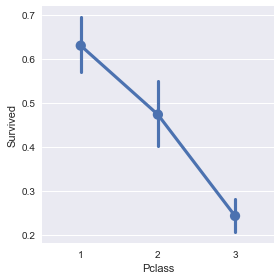

In [5]:
# Pclass - Its is a numerical catorgircal feature with order, lets plot graph & see its relevance 
sns.factorplot(x="Pclass",y='Survived',data=train_data)

# Survial chances if passenger is sitting in Class1>>Class2>Class3

# Name

In [6]:
# Name - well name shouldn't affect the survival of the passenger but it can be an important feature 
# what extra information i can get from passenger's name ???
train_data['Name'].head()
#hmm!! we can see below that we can fetch the family Names of passengers it could be a usefull feature to answer other
# questions like "Ethnicity" of the passengers survived. since it is not usufull in our main prediction task 
# i am leaving it for now . 
del train_data['Name']

# Sex

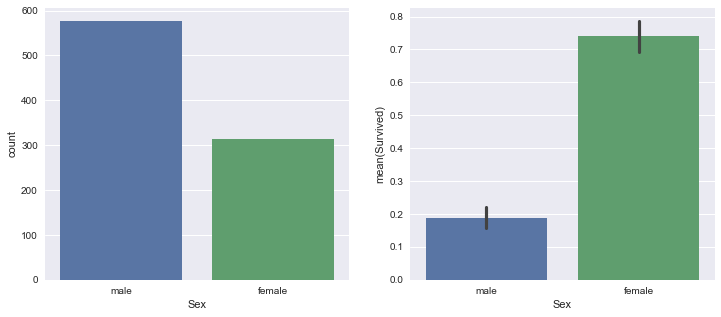

In [7]:
# Sex- it would be interseting to see this feature's relation with 'Survived' feature
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.barplot(x='Sex',y='Survived',data=train_data,ax=ax2)
sns.countplot(train_data["Sex"],ax=ax1)

# As we can see that 'gender affects survival chances' so this feature will be important

# Age

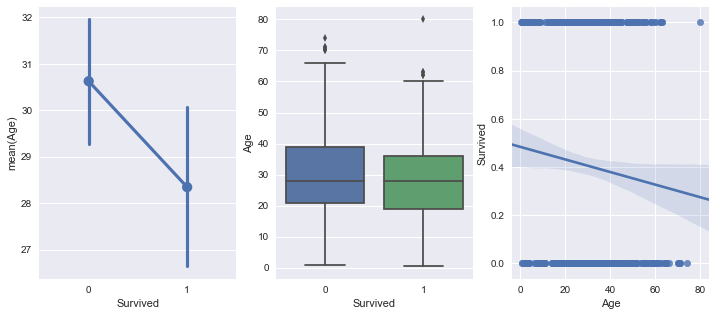

In [8]:
# age- Lets what how age impacts the chances of survival
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
sns.factorplot(x="Survived",y="Age",data=train_data,ax=ax1)
sns.boxplot(x="Survived",y="Age",data=train_data,ax=ax2)
sns.regplot(x='Age',y='Survived',data=train_data,ax=ax3)
plt.close(2)

# As we can see from above graphs feature 'Age' is in realtion with 'Survived' so it would be usuful while trianing our algorithm

# Sibsp(siblings/spouse) & Parch(parents/children) abord

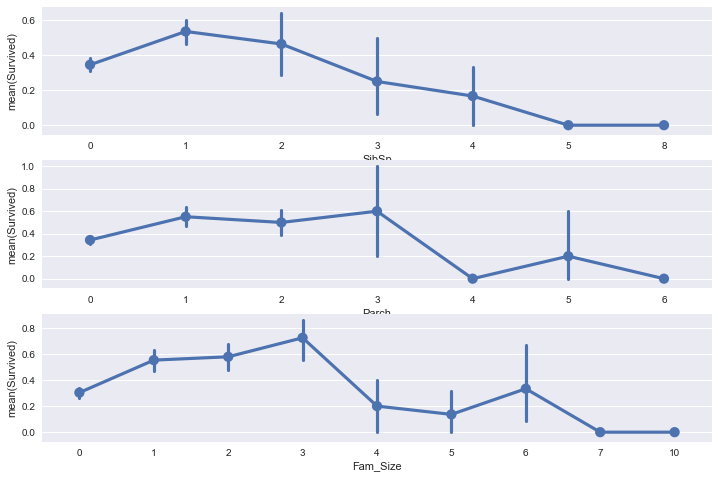

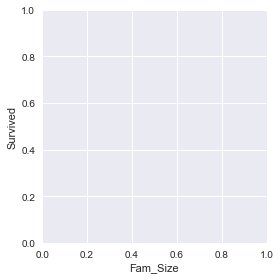

In [9]:
# we can add these features to create new feature called "Fam_Size"
train_data['Fam_Size']= train_data['SibSp'] + train_data['Parch']
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,8))
sns.factorplot(x="SibSp",y="Survived",data=train_data,ax=ax1)
sns.factorplot(x="Parch",y="Survived",data=train_data,ax=ax2)
sns.factorplot(x="Fam_Size",y="Survived",data=train_data,ax=ax3)

plt.close(2)
plt.close(3)
 

# As we can see from above graphs that passengers with family size of (1,2,3) have higher chances of survival so this feature also be useful

In [10]:
# since we are goint to work with Fam_Size lets delete Sibsp & Parch
del train_data["SibSp"]
del train_data['Parch']

# Ticket

In [11]:
train_data["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

# This feature(ticket number) is alpha numbric & random, we could have analye it's pattern find cabin assignment but we already have cabin details so lets skip this feature

In [12]:
del train_data["Ticket"]

# Fare

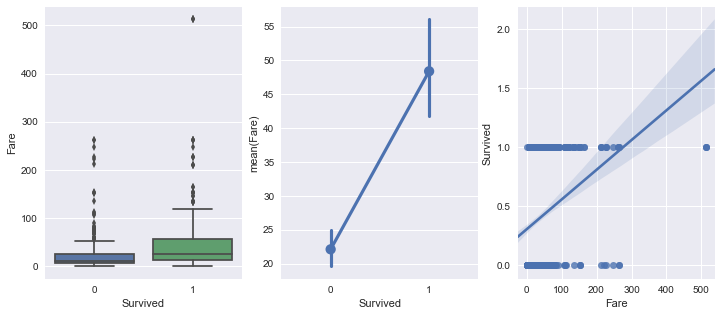

In [13]:
# IT would be interesting to see Fare & Survival realtion-ship
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(x='Survived',y='Fare',data=train_data,ax=ax1)
sns.factorplot(x='Survived',y='Fare',data=train_data,ax=ax2)
sns.regplot(x='Fare',y='Survived',data=train_data,ax=ax3)
plt.close(2)


# Higher the fare & Better chances of survival
---
# Note- Features 'Pclass','Fare','Cabin' might be highly correalted so we will checking for Pearson's coefficient to validate the independance of features
---


# Cabin
# This feature has 687 missing values & it is alpha-numeric so we will be handling this feature in Missing Values section of notebook

---

# Embarked

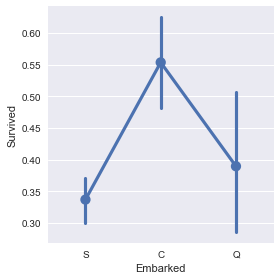

In [14]:
# This feature has very few (only 2) missing values lets have a visualize this feature
#sns.countplot(train_data['Embarked'])
sns.factorplot(x='Embarked',y='Survived',data=train_data)

# Survival rate is higher at 'C' we can use this info to find missing values in next section

In [15]:
# Lets look at our dataframe now
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Fam_Size
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


# 2.2) Impute Missing Values

# Embarked

In [16]:
#only 2 missing values lets print rows with missing values
train_data[train_data["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Fam_Size
61,1,1,female,38.0,80.0,B28,NaN,0
829,1,1,female,62.0,80.0,B28,NaN,0


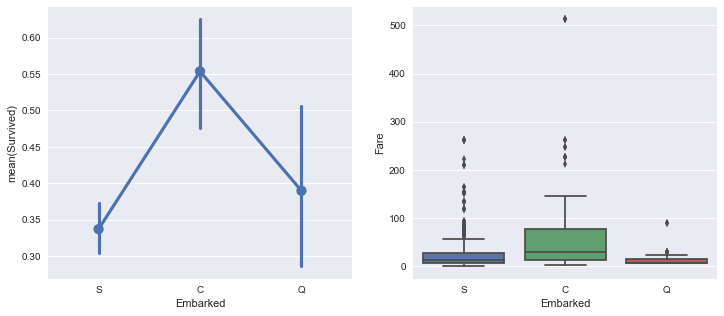

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.factorplot(x='Embarked',y='Survived',data=train_data,ax=ax1)
sns.boxplot(x='Embarked',y='Fare',data=train_data,ax=ax2)
plt.close(2)

# As we can see that passengers with higher fare & high mean survival embarked from 'C' so lets fill our missing values with 'C' because our missing embarked rows have survived-1 & fare- 80

In [18]:
train_data['Embarked']=train_data['Embarked'].fillna('C')

# Cabin

In [19]:
#687 missing values , lets fill them with the help of other features
train_data['Cabin'].head(5)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [20]:
# As we can see above that cabin is alphnumeric , here we are not interted in the end digit of cabin lets just filter out
#first letter of cabin that way we will have a categorical variable(easy to analyze).
train_data['Cabin_Id'] = train_data['Cabin'].str[0]
#now we have our required data in cabin_id column we don't need 'Cabin' anymore
del train_data['Cabin']
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_Size,Cabin_Id
0,0,3,male,22.0,7.2500,S,1,NaN
1,1,1,female,38.0,71.2833,C,1,C
2,1,3,female,26.0,7.9250,S,0,NaN
3,1,1,female,35.0,53.1000,S,1,C
4,0,3,male,35.0,8.0500,S,0,NaN


# We will predict the missing values of Cabin_id by applying multiclass classifer algorithms on features 'Fam_Size','Fare','Pclass','Survived' .

In [21]:
new_train=train_data[train_data['Cabin_Id'].notnull()]
new_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_Size,Cabin_Id
1,1,1,female,38.0,71.2833,C,1,C
3,1,1,female,35.0,53.1000,S,1,C
6,0,1,male,54.0,51.8625,S,0,E
10,1,3,female,4.0,16.7000,S,2,G
11,1,1,female,58.0,26.5500,S,0,C


In [22]:
# depedent variables
X = new_train.iloc[:,[0,1,4,6]].values
y = new_train.iloc[:,7].values


# SVM

In [23]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()                                              


/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.34347766884531589

# LogisticRegression

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()                                              


/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.30072167755991286

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,random_state=0)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean() 

/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.50517429193899777

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean() 

/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


0.58289079520697173

# This is the best accurcy i could get for Missing values in "Cabin" Using KNN. Lets predict the values for remaining Nans in 'Cabin'

In [27]:
# here new_train will store all the data with Nan In Cabin
df=train_data[train_data['Cabin_Id'].isnull()]
df.head()
k = df.iloc[:,[0,1,4,6]].values
pred = clf.predict(k)

In [28]:
#now add these predicted values of Cabin_Id to datafraem
df['Cabin_Id'] = pred
train_data = new_train.append(df)
train_data.head()

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_Size,Cabin_Id
1,1,1,female,38.0,71.2833,C,1,C
3,1,1,female,35.0,53.1000,S,1,C
6,0,1,male,54.0,51.8625,S,0,E
10,1,3,female,4.0,16.7000,S,2,G
11,1,1,female,58.0,26.5500,S,0,C


# Handling Missing Values in AGE
- It is continuous variable so will be using Regression to fill the empty spots

In [29]:
# new dataframe- Contains the rows with known age
new_train = train_data[train_data["Age"].notnull()]
new_train.head()
# features
X = new_train.iloc[:,[0,1,4,6]].values
# Age 
y = new_train.iloc[:,3].values

# Predicting Age Using Lasso

In [30]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=0)
reg = linear_model.Lasso (alpha = 0.1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_val)
# Calculating Mean Square Error
mean_squared_error(y_val, y_pred) 

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


165.6432607663989

# Predicting Age Using Ridge Regression

In [31]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=0)
reg = linear_model.Ridge (alpha = 0.1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_val)
# Calculating Mean Square Error
mean_squared_error(y_val, y_pred) 

165.09054642108487

# 165 is the mean squared error of our regression model for AGE lets compare it with mean squared error when we use Mean Instead of Regression predictions

In [32]:
#Compaer it with mean
y_mean =np.empty(143)
y_mean.fill(y_pred.sum()/len(y_pred))
mean_squared_error(y_val, y_mean) 

220.7010686072949

# MSE if Age is filled by mean= 220
# MSE if Age is filled by Regression Prediction = 165
Now lets fill our missing Age with predicted values

In [33]:
df=train_data[train_data["Age"].isnull()]
# features
X = df.iloc[:,[0,1,4,6]].values
# Age 
y = reg.predict(X)
df['Age']=y
train_data = new_train.append(df)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Lets Look at our training data now- (No Missing Values)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 888
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
Fam_Size    891 non-null int64
Cabin_Id    891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


# 2.3) Converting Categorical Features to Numeric data

In [35]:
train_data.head()
#We have Sex, Embarked, Cabin_id as categorical features

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_Size,Cabin_Id
1,1,1,female,38.0,71.2833,C,1,C
3,1,1,female,35.0,53.1000,S,1,C
6,0,1,male,54.0,51.8625,S,0,E
10,1,3,female,4.0,16.7000,S,2,G
11,1,1,female,58.0,26.5500,S,0,C


# These features are non ordinal-categorical features , direct assignment of numeric valuse will lead to bad predictions so here we will use "dummies"
---
# Embark

In [36]:
Embark_dummy = pd.get_dummies(train_data["Embarked"])
Embark_dummy.head(5)

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1


# Sex

In [37]:
# we do not need to do for featre "SEX" because it is anyways in 2 categoreis but just for understansding lets do it.
Sex_dummy = pd.get_dummies(train_data["Sex"])
Sex_dummy.head(5)

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


# Cabin

In [38]:
Cabin_dummy = pd.get_dummies(train_data["Cabin_Id"])
Cabin_dummy.head(5)

,A,B,C,D,E,F,G,T
1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,1,0
11,0,0,1,0,0,0,0,0


# In order to make above values independent we need to delete 1 column from each of them.

In [39]:
del Embark_dummy['S']
del Cabin_dummy['T']
del Sex_dummy['female']

# Now lets add these featers to our train_data dataframe & delete old Embark,Cabin_id,Sex

In [40]:
train_data['Sex'] = Sex_dummy['male']
train_data['Embark_C'] = Embark_dummy['C']
train_data['Embark_Q'] = Embark_dummy['Q']
train_data['Cabin_A'] = Cabin_dummy['A']
train_data['Cabin_B'] = Cabin_dummy['B']
train_data['Cabin_C'] = Cabin_dummy['C']
train_data['Cabin_D'] = Cabin_dummy['D']
train_data['Cabin_E'] = Cabin_dummy['E']
train_data['Cabin_F'] = Cabin_dummy['F']
train_data['Cabin_G'] = Cabin_dummy['G']
del train_data['Sex']
del train_data['Embarked']
del train_data['Cabin_Id']

# Below is our completely processed data.

In [41]:
train_data.head(10)

,Survived,Pclass,Age,Fare,Fam_Size,Embark_C,Embark_Q,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
1,1,1,38.0,71.2833,1,1,0,0,0,1,0,0,0,0
3,1,1,35.0,53.1000,1,0,0,0,0,1,0,0,0,0
6,0,1,54.0,51.8625,0,0,0,0,0,0,0,1,0,0
10,1,3,4.0,16.7000,2,0,0,0,0,0,0,0,0,1
11,1,1,58.0,26.5500,0,0,0,0,0,1,0,0,0,0
21,1,2,34.0,13.0000,0,0,0,0,0,0,1,0,0,0
23,1,1,28.0,35.5000,0,0,0,1,0,0,0,0,0,0
27,0,1,19.0,263.0000,5,0,0,0,0,1,0,0,0,0
52,1,1,49.0,76.7292,1,1,0,0,0,0,1,0,0,0
54,0,1,65.0,61.9792,1,1,0,0,1,0,0,0,0,0


# 3) Final Predictions
---
# 3.1) check for correlation

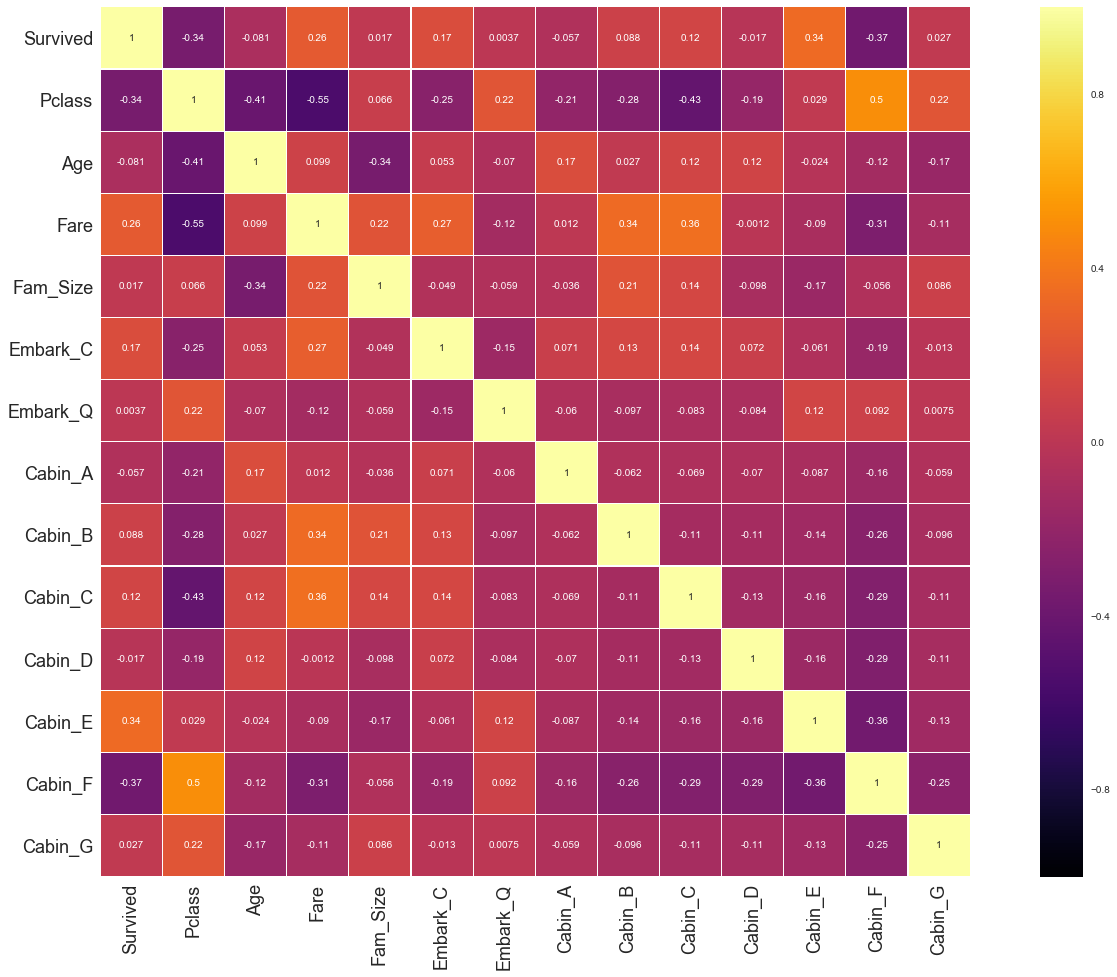

In [42]:
corr = train_data.corr()
f, ax = plt.subplots(figsize=(25,16))
sns.plt.yticks(fontsize=18)
sns.plt.xticks(fontsize=18)

sns.heatmap(corr, cmap='inferno', linewidths=0.1,vmax=1.0, square=True, annot=True)

# There is high correlation between 'Pclass' & 'Cabin' features. i will try our algorithms with 'both' features & by 'eliminating one of them' to see if we get any better results
---
# 3.2) Applying Models
# SVM

In [43]:
# features
X = train_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]].values
# dependent variable
y = train_data.iloc[:,0].values

In [44]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean()                                              



0.78131623475653755

# RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=15,random_state=0)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean() 

0.81610544320746115

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
scores = cross_val_score(clf, X, y, cv=4)
scores.mean() 

0.74537100661680256

# 3.3) Accuracy
---
---

# KNN- 74
# RandomForest- 81.6
# Support Vector- 78.1

---
---
# more to improve in this kernel :) will come up with updates